In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
 

In [3]:
mydata = pd.read_csv("AB_NYC_2019.csv")
mydata.head()
mydata.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


(array([4.8597e+04, 1.8800e+02, 5.7000e+01, 1.8000e+01, 9.0000e+00,
        8.0000e+00, 7.0000e+00, 3.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <BarContainer object of 10 artists>)

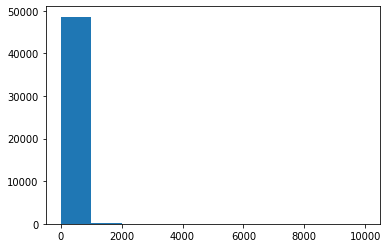

In [4]:
mydata.price.head()
plt.hist(mydata.price)

In [61]:
columns = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", 
           "reviews_per_month", "calculated_host_listings_count", "availability_365"]

mydata2 = mydata.copy()
mydata2 = mydata2[columns]
print(mydata2.head())
print(mydata2.isna().sum())

   latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
latitude                              0
longitude                             0
price                                 0
minimum_nights                   

In [23]:
mydata2.describe()
mydata2["minimum_nights"].describe()  # Median is 3

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [62]:
np.random.seed(42)

N = len(mydata2)
idx = np.arange(N)
np.random.shuffle(idx)

mydata_shuffled = mydata2.iloc[idx]
print(mydata_shuffled)

       latitude  longitude  price  minimum_nights  number_of_reviews  \
879    40.64354  -73.97777     89               3                 62   
44383  40.70666  -73.90779     30              21                  0   
15394  40.76116  -73.99016    120               2                 17   
43230  40.70763  -74.01050    470               2                  5   
16332  40.79658  -73.93287    199               2                 30   
...         ...        ...    ...             ...                ...   
11284  40.84650  -73.94319     60               1                  0   
44732  40.73957  -74.00082     85               2                  4   
38158  40.78318  -73.97372    130              30                  1   
860    40.77508  -73.97990    150               2                 11   
15795  40.74657  -73.94555    120               5                  1   

       reviews_per_month  calculated_host_listings_count  availability_365  
879                 0.71                               1  

In [63]:
n_val = int(0.2 * N)
n_test = int(0.2 * N)
n_train = N - (n_val + n_test)

mydata_train = mydata_shuffled.iloc[:n_train]
mydata_val = mydata_shuffled.iloc[n_train : (n_train + n_val)]
mydata_test = mydata_shuffled.iloc[(n_train + n_val) :]

print(f'Train set has : {mydata_train.shape[0]} rows')
print(f'Validation set has : {mydata_val.shape[0]} rows')
print(f'Test set has : {mydata_test.shape[0]} rows')

mydata_train.head()

Train set has : 29337 rows
Validation set has : 9779 rows
Test set has : 9779 rows


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [64]:
# remove price from the dataset
target_train = mydata_train.price
target_val = mydata_val.price
target_test = mydata_test.price

del mydata_train["price"]
del mydata_val["price"]
del mydata_test["price"]


In [65]:
mydata_train.head()
#mydata_val.head()
#mydata_test.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,3,62,0.71,1,189
44383,40.70666,-73.90779,21,0,NaN,1,73
15394,40.76116,-73.99016,2,17,0.43,1,0
43230,40.70763,-74.01050,2,5,1.88,327,272
16332,40.79658,-73.93287,2,30,0.80,1,30


In [66]:
target_train_log = np.log1p(target_train)
target_val_log = np.log1p(target_val)
target_test_log = np.log1p(target_test)

target_train_log.head()

879      4.499810
44383    3.433987
15394    4.795791
43230    6.154858
16332    5.298317
Name: price, dtype: float64

# Question 3


In [67]:
mydata_train.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,29337.000000,29337.000000,29337.000000,29337.000000,23339.000000,29337.000000,29337.000000
mean,40.729226,-73.951838,6.989740,23.312336,1.368549,7.125166,112.825988
std,0.054399,0.046325,21.014583,44.628122,1.653934,32.844933,131.730809
min,40.507080,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690460,-73.982890,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723450,-73.955590,2.000000,5.000000,0.710000,1.000000,45.000000
75%,40.763170,-73.935880,5.000000,24.000000,2.030000,2.000000,228.000000
max,40.913060,-73.712990,1000.000000,629.000000,27.950000,327.000000,365.000000


In [68]:
mydata_train.isna().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [69]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
    
    
    
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)    



def model_LR(X, y, w0, w):
    y_pred = w0 + X.dot(w)
    error = rmse(y, y_pred)
    return error
    
def prepare_dataset(X, y, filled_value):
    X = X.copy()
    y_log = np.log1p(y)
    X = X.fillna(filled_value)  
    X
    return X.values, y_log


In [70]:
train_model_1 = prepare_dataset(mydata_train, target_train, 0.0)
w0_1, w_1 = train_linear_regression(train_model_1[0], train_model_1[1])

Mean = mydata_train["reviews_per_month"].mean()
train_model_2 = prepare_dataset(mydata_train, target_train, Mean)
w0_2, w_2 = train_linear_regression(train_model_2[0], train_model_2[1])


val_model1 = model_LR(mydata_val, target_val_log, w0_1, w_1)
print(f"Zero-filled missing values produce rmse: {np.round(val_model1, 2)}")

val_model2 = model_LR(mydata_val, target_val_log, w0_2, w_2)
print(f"Mean-filled missing values produce rmse: {np.round(val_model2, 2)}")


Zero-filled missing values produce rmse: 0.61
Mean-filled missing values produce rmse: 0.61


# Question 4

In [71]:
list_r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

    
for i in list_r:
    df = prepare_dataset(mydata_train, target_train, 0.0)
    w0, w = train_linear_regression_reg(df[0], df[1], i)
    
    val_model = model_LR(mydata_val, target_val_log, w0, w)
    print(f'For r = {i}, the rmse = {np.round(val_model, 2)}')    


For r = 0, the rmse = 0.61
For r = 1e-06, the rmse = 0.61
For r = 0.0001, the rmse = 0.61
For r = 0.001, the rmse = 0.62
For r = 0.01, the rmse = 0.63
For r = 0.1, the rmse = 0.65
For r = 1, the rmse = 0.65
For r = 5, the rmse = 0.65
For r = 10, the rmse = 0.65


# Question 5 

In [72]:
def different_seed(X, seed):
    
    np.random.seed(i)

    X = X.copy()
    
    N = len(X)
    idx = np.arange(N)
    np.random.shuffle(idx)

    mydata_shuffled = X.iloc[idx]
    n_val = int(0.2 * N)
    n_test = int(0.2 * N)
    n_train = N - (n_val + n_test)
    
    mydata_train = mydata_shuffled.iloc[:n_train]
    mydata_val = mydata_shuffled.iloc[n_train: n_train + n_val]
    mydata_test = mydata_shuffled.iloc[n_train + n_val:]

    y_train = np.log1p(mydata_train["price"])    
    y_val = np.log1p(mydata_val["price"])
    y_test = np.log1p(mydata_test["price"])
    
    del mydata_train["price"]
    del mydata_val["price"]
    del mydata_test["price"]
    
    mydata_train = mydata_train.fillna(0.0)  

    w0, w = train_linear_regression(mydata_train, y_train)
    val_model = model_LR(mydata_val, y_val, w0, w)
    return val_model
    

In [73]:
seeds = np.arange(0, 10)
rmse_list = list()

for i in seeds:
    error = different_seed(mydata2, i)
    rmse_list.append(error)
    print(f"Seed {i} produce rmse: {np.round(error, 3)}")


Seed 0 produce rmse: 0.623
Seed 1 produce rmse: 0.614
Seed 2 produce rmse: 0.622
Seed 3 produce rmse: 0.613
Seed 4 produce rmse: 0.614
Seed 5 produce rmse: 0.604
Seed 6 produce rmse: 0.607
Seed 7 produce rmse: 0.624
Seed 8 produce rmse: 0.621
Seed 9 produce rmse: 0.62


In [74]:
print(rmse_list)
print(f'Standard deviation of rmse is: {np.round(np.std(rmse_list), 3)}')

[0.6225612526994966, 0.6136950482774829, 0.6220712984789946, 0.6134841315002622, 0.6137929474219275, 0.6040844421900416, 0.6068338485227209, 0.6235301925114564, 0.6214296225676926, 0.6202251571060258]
Standard deviation of rmse is: 0.007


# Question 6


In [75]:
np.random.seed(9)

df = mydata2.copy()

N = len(df)
idx = np.arange(N)
np.random.shuffle(idx)
mydata_shuffled = df.iloc[idx]

n_val = int(0.2 * N)
n_test = int(0.2 * N)
n_train = N - (n_val + n_test)

mydata_train = mydata_shuffled.iloc[:n_train]
mydata_val = mydata_shuffled.iloc[n_train: n_train + n_val]
mydata_test = mydata_shuffled.iloc[n_train + n_val:]

y_train = np.log1p(mydata_train["price"])    
y_val = np.log1p(mydata_val["price"])
y_test = np.log1p(mydata_test["price"])

del mydata_train["price"]
del mydata_val["price"]
del mydata_test["price"]

df_full = pd.concat([mydata_train, mydata_val])
y_full = np.concatenate([y_train, y_val])

df_full = df_full.fillna(0.0)  


w0, w = train_linear_regression_reg(df_full, y_full, 0.001)

test_model = model_reg_LR(mydata_test, y_test, w0, w)


print(np.round(test_model, 2))

0.62
